# **Домашнее задание 2: Градиентный спуск (base)**

В этом задании две части - теоретическая и практическая. Теорию можно набирать, используя LaTex или просто решать на листочке, сфотографировать и отправить вместе с заполненным ноутбуком в anytask.

Максимальный балл за домашнее задание: min{10, ваш балл}.

In [ ]:
!pip install sympy


In [ ]:
import sympy as sp
from sympy.plotting import plot
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd

## Задание 1 (0.5 балла)



Найдите экстремумы следующих функций (вручную, где возможно) и укажите их тип (максимум, минимум):

a) $f(x) = x^2 - 30x + 1$

b) $g(x) = -x^3 + 5x - 7x^2 + 17$

c) $h(x) = x^2 - 1/x$

d) $j(x) = 1/x^5 + x^{17} + 8$

**Сделал в pdf**
___

## Задание 2 (1 балл)

Найдите экстремумы этих функций в Python.

In [ ]:
# your code here
x = sp.Symbol('x')

# Функция для нахождения экстремумов
def extremum(function):
    # Дифференцируем функцию
    der = sp.diff(function, x)
    extr = sp.solve(der, x)
    real_extr = [point for point in extr if point.is_real]

    return real_extr

functions = {
    'a': x**2 - 30*x + 1,
    'b': -x**3 + 5*x - 7*x**2 + 17,
    'c': x**2 - 1/x,
    'd': 1/x**5 + x**17 + 8}

# Цикл по функциям
for key, function in functions.items():
    extr = extremum(function)
    print(f'Найдены экстремумы для функции {key}(x): {extr}')
    print('-' * 20)

Найдены экстремумы для функции a(x): [15]
--------------------
Найдены экстремумы для функции b(x): [-5, 1/3]
--------------------
Найдены экстремумы для функции c(x): [-2**(2/3)/2]
--------------------
Найдены экстремумы для функции d(x): [-17**(21/22)*5**(1/22)/17, 17**(21/22)*5**(1/22)/17]
--------------------


## Задание 3 (1 балл)

Найдите точки перегиба функций из задания 1 (вручную, где возможно).

**Сделал в pdf***
___

## Задание 4 (1 балла)


Найдите точки перегиба этих функций в Python.

In [ ]:
# Функция для нахождения точек перегиба
def points(function):
    second_der = sp.diff(function, x, 2)
    critical_points = sp.solve(second_der, x)
    real_critical_points = [point for point in critical_points if point.is_real]


    def second_derivative(point):
        eps= 0.01
        left_value = second_der.subs(x, point - eps).evalf()
        right_value = second_der.subs(x, point + eps).evalf()

        return left_value * right_value <= 0
    inf_points = [point for point in real_critical_points if second_derivative(point)]
    return inf_points


functions = {
    'a': x**2 - 30*x + 1,
    'b': -x**3 + 5*x - 7*x**2 + 17,
    'c': x**2 - 1/x,
    'd': 1/x**5 + x**17 + 8
}

# Цикл по функциям
for key, function in functions.items():
    inf_points = points(function)
    print(f"Точки перегиба для функции {key}(x): {inf_points}")
    print('-' * 20)

Точки перегиба для функции a(x): []
--------------------
Точки перегиба для функции b(x): [-7/3]
--------------------
Точки перегиба для функции c(x): [1]
--------------------
Точки перегиба для функции d(x): []
--------------------


### Внимание! Далее все задания необходимо выполнять для ВСЕХ функций из задания 1!

## Задание 5 (1 балл)

Постройте графики функций из задания 1 в Python (не забудьте подписать оси и сами графики):
*   изобразите графики с подписанными осями
*   отметьте одним цветом локальные экстремумы
*   отметьте другим цветом точки перегиба
*   подпишите на оси x значения экстремумов и точек перегиба

P.S. Для того, чтобы отметить точку на графике, вам понадобится функция (plt.scatter), а для того, чтобы подписать её значение на оси (plt.annotate).

Пример хорошего графика:

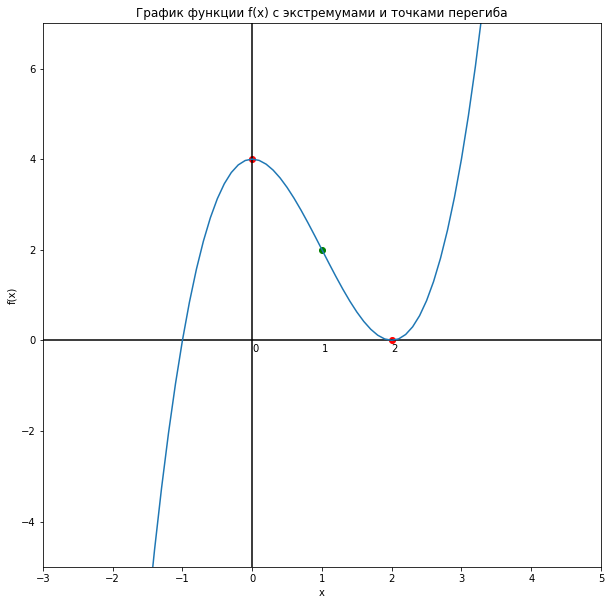

In [ ]:
functions = [(x**2 - 30*x + 1, (-50, 50), (-250, 100), "$f(x) = x^2 - 30x + 1$"),
    (-x**3 + 5*x - 7*x**2 + 17, (-50, 50), (-70, 70), "$g(x) = -x^3 + 5x - 7x^2 + 17$"),
    (x**2 - 1/x, (-5, 5), (-50, 50), "$h(x) = x^2 - 1/x$"),
    (1/x**5 + x**17 + 8, (-10, 10), (-50, 50), "$j(x) = 1/x^5 + x^{17} + 8$")]


In [ ]:
def rec(function, x_range, y_range, label):
    x = sp.Symbol('x')
    x_vals = np.linspace(x_range[0], x_range[1], 1000)
    func_lambdified = sp.lambdify(x, function, 'numpy')
    y_vals = func_lambdified(x_vals)

    # Поиск экстремумов
    first_derivative = sp.diff(function, x)
    critical_points = sp.solve(first_derivative, x)
    second_derivative = sp.diff(first_derivative, x)

    extrema_points = []
    for point in critical_points:
        if point.is_real:
            sd_value = second_derivative.subs(x, point).evalf()
            if sd_value > 0 or sd_value < 0:
                extrema_points.append((float(point), float(function.subs(x, point))))

    # Поиск точек перегиба
    inflection_points = []
    second_derivative_zero = sp.solve(second_derivative, x)
    for point in second_derivative_zero:
        if point.is_real:
            value_left = second_derivative.subs(x, point - 0.001).evalf()
            value_right = second_derivative.subs(x, point + 0.001).evalf()
            if value_left * value_right < 0:
                inflection_points.append((float(point), float(function.subs(x, point))))

    plt.figure(figsize=(8, 8))
    plt.plot(x_vals, y_vals, label=f"{label}", color='blue')

    # Экстремумы
    for ex_x, ex_y in extrema_points:
        plt.scatter(ex_x, ex_y, color='red', label='Экстремум')
        plt.annotate(f'({ex_x:.2f}, {ex_y:.2f})', (ex_x, ex_y), textcoords="offset points", xytext=(0, 10), ha='center')

    # Точки перегиба
    for inf_x, inf_y in inflection_points:
        plt.scatter(inf_x, inf_y, color='green', label='Точка перегиба')
        plt.annotate(f'({inf_x:.2f}, {inf_y:.2f})', (inf_x, inf_y), textcoords="offset points", xytext=(0, 10), ha='center')

    plt.xlim(x_range)
    plt.ylim(y_range)
    plt.axhline(0, color='black')
    plt.axvline(0, color='black')
    plt.title('График функции с экстремумами и точками перегиба')
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.show()

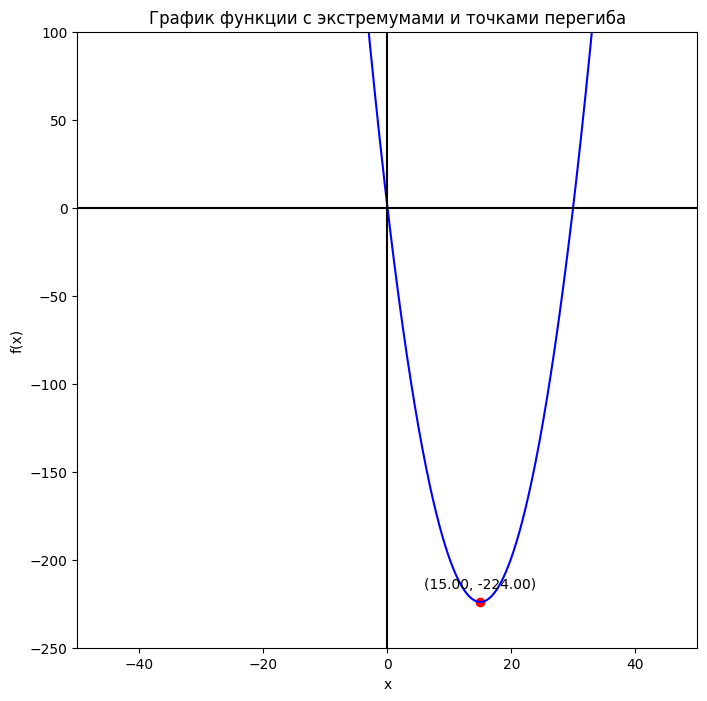

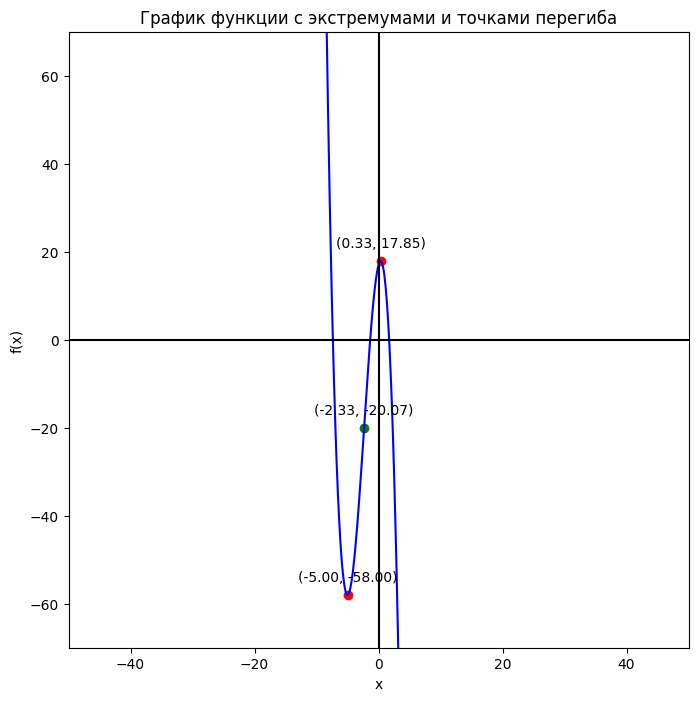

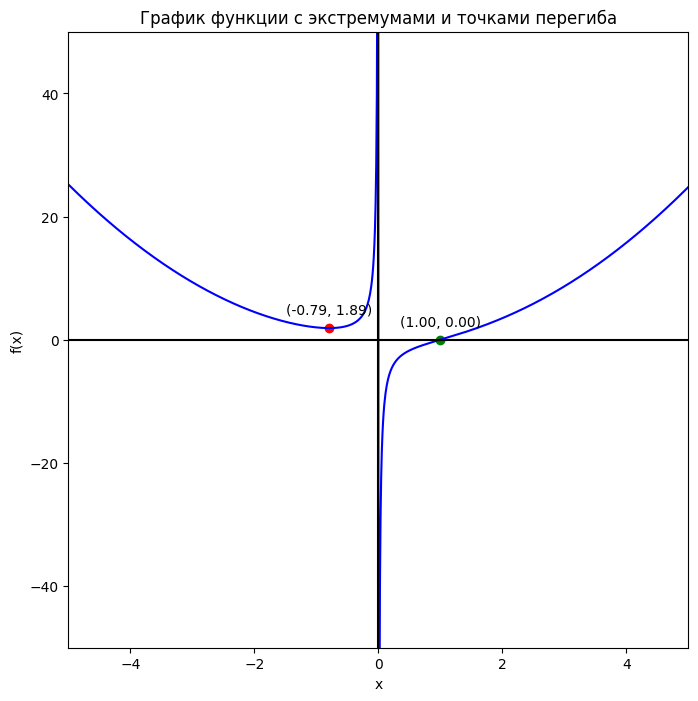

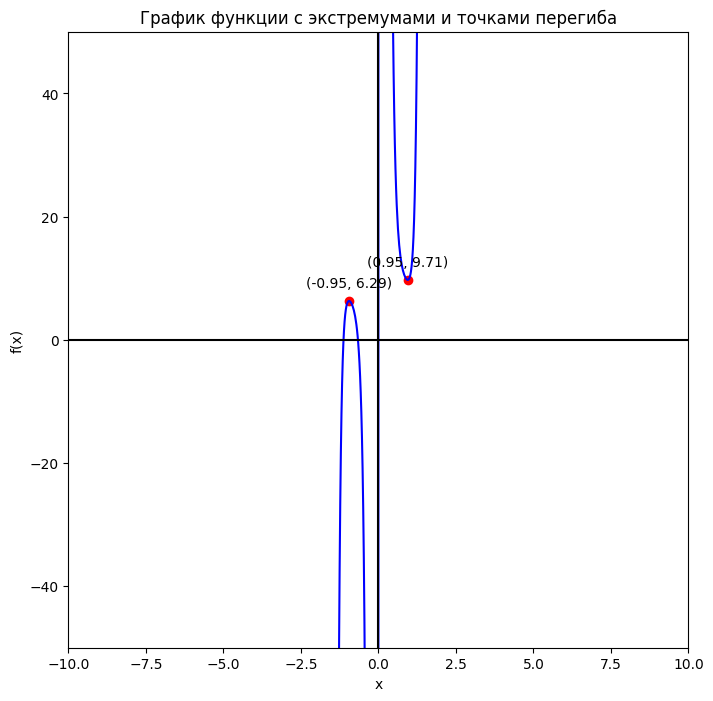

In [ ]:
for function, x_range, y_range, label in functions:
    rec(function, x_range, y_range, label)
    print()

## Задание 6 (1 балл)

Модифицируйте функцию, осуществляющую метод градиентного спуска с семинара: добавьте опцию останавливать метод, если абсолютное значение производной функции в точке < некоторого $\delta$ (delta добавьте в аргументы функции).

In [ ]:
# your code here
functions = [x**2 - 30*x + 1,
    -x**3 + 5*x - 7*x**2 + 17,
    x**2 - 1/x,
    1/x**5 + x**17 + 8]

In [ ]:
def f(func, x_val):
    try:
        return func.subs(x, x_val).evalf()
    except:
        return np.nan

In [ ]:
def gradient(func):
    return sp.diff(func)

In [ ]:
def gradient_descent(func, x_start, learning_rate, epsilon, delta, num_iterations):
    x_curr = x_start
    df_x = gradient(func)

    trace = []
    trace.append(x_curr)

    for i in range(num_iterations):
        derivative = df_x.subs(x, x_curr).evalf()

        if abs(derivative) < delta:
            return x_curr, trace

        x_new = x_curr - learning_rate * derivative
        trace.append(x_new)

        if abs(x_new - x_curr) < epsilon:
            return x_curr, trace

        x_curr = x_new

    return x_curr, trace

## Задание 7 (1 балл)

Подберите начальное приближение (сделайте несколько запусков из случайной начальной точки) и шаг градиентного спуска таким образом, чтобы процедура выдавала правильное значение наименьшего локального минимума функций (если он есть):
- [ ] в качестве результата выведите на экран значение начального приближения ($x_0$), `learning_rate`
- [ ] нарисуйте график функции и изобразите на нём наименьший из найденных локальных минимумов; на оси $x$ подпишите значение этого минимума. \
(Постарайтесь сделать реализацию графика в виде функции, чтобы оптимизировать процесс. Потом функция понадобится вам в задании 9, но это не обязательное требование).
- [ ] если такой точки у функции нет, поясните это текстом при помощи Markdown

In [ ]:
# your code here
def plot_function(func, mnima, x_range, y_range):

    x_vals = [x for x in np.arange(x_range[0], x_range[1], 0.1)]
    y_vals = [f(func, x) for x in x_vals]

    plt.figure(figsize=(8, 8))
    plt.plot(x_vals, y_vals, label=f"{func}", color='blue')

    y_mnima = f(func, mnima)
    plt.scatter(mnima, y_mnima, color='red', label='Экстремум')
    plt.annotate(f'({mnima:.2f}, {y_mnima:.2f})', (mnima, y_mnima), textcoords="offset points", xytext=(0, 10), ha='center')
    plt.xlim(x_range)
    plt.ylim(y_range)
    plt.axhline(0, color='black')
    plt.axvline(0, color='black')
    plt.title('График функции с локальным минимумом')
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.show()

x0 = 10
learning_rate = 0.01


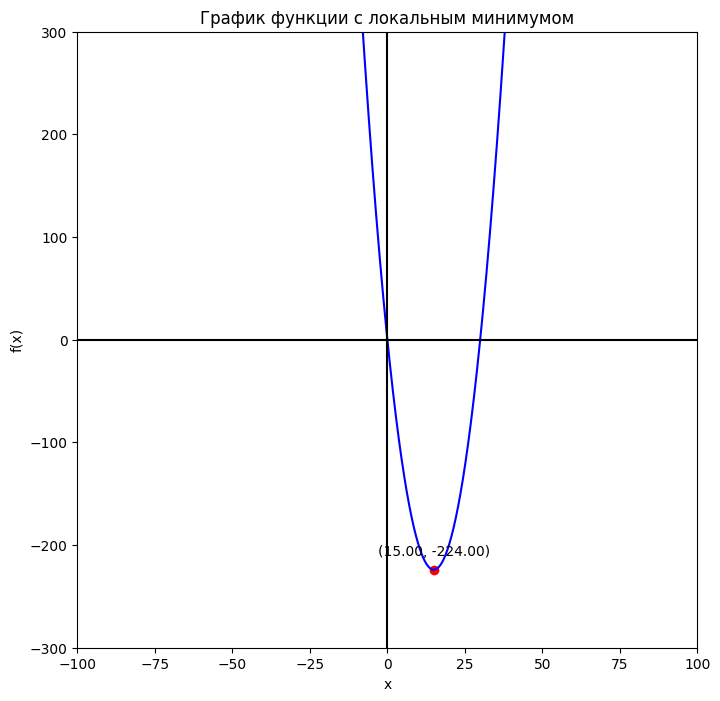

In [ ]:
# Функция f(x)
x_start = 10
lr = 0.01
eps = 1e-5
delta = 1e-5
num_iter = 1000
func1 = functions[0]
min_val, trace = gradient_descent(func1, x_start, lr, eps, delta, num_iter)

print(f'x0 = {x_start}')
print(f'learning_rate = {lr}')
x_range = (-100, 100)
y_range = (-300, 300)
plot_function(func1, min_val, x_range, y_range)

x0 = -10
learning_rate = 0.05


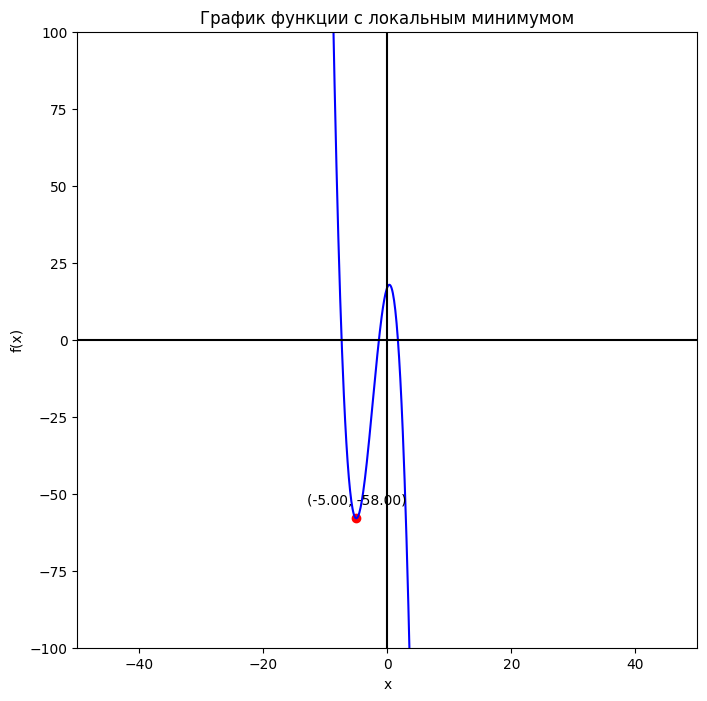

In [ ]:
# Функция g(x)
x_start = -10
lr = 0.05
eps = 1e-5
delta = 1e-5
num_iter = 1000
func2 = functions[1]
min_val, trace = gradient_descent(func2, x_start, lr, eps, delta, num_iter)


print(f'x0 = {x_start}')
print(f'learning_rate = {lr}')
x_range = (-50, 50)
y_range = (-100, 100)
plot_function(func2, min_val, x_range, y_range)

x0 = -40
learning_rate = 0.001


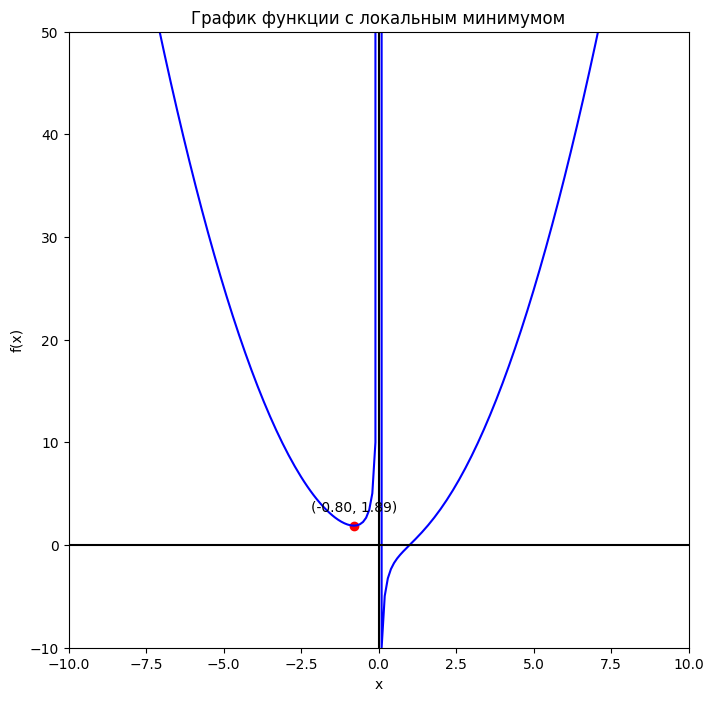

In [ ]:
# Функция h(x)
x_start = -40
lr = 0.001
eps = 1e-5
delta = 1e-5
num_iter = 10000
func3 = functions[2]
min_val, trace = gradient_descent(func3, x_start, lr, eps, delta, num_iter)

print(f'x0 = {x_start}')
print(f'learning_rate = {lr}')
x_range = (-10, 10 )
y_range = (-10, 50)
plot_function(func3, min_val, x_range, y_range)

x0 = 0.5
learning_rate = 0.001


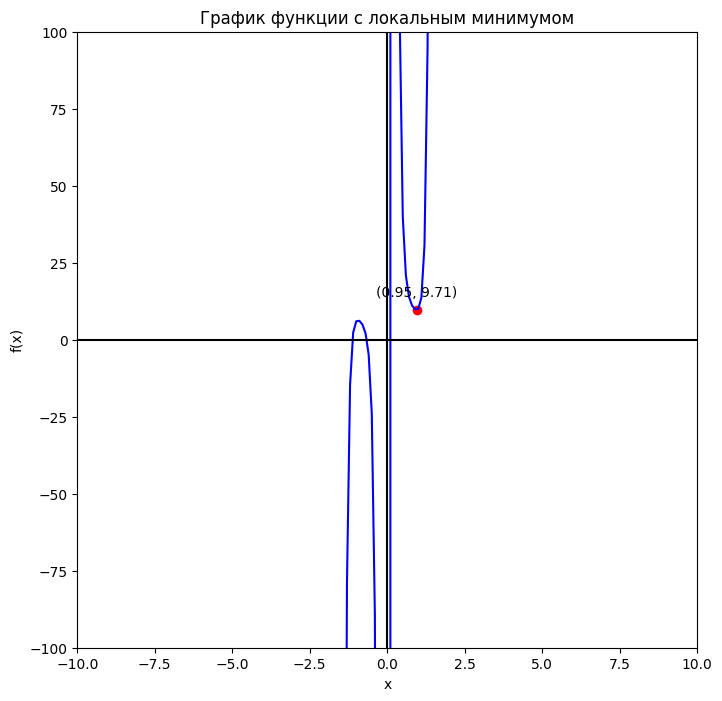

In [ ]:
# Функция j(x)
x_start = 0.5
lr = 0.001
eps = 1e-6
delta = 1e-6
num_iter = 5000
func4 = functions[3]
min_val, trace = gradient_descent(func4, x_start, lr, eps, delta, num_iter)


print(f'x0 = {x_start}')
print(f'learning_rate = {lr}')
x_range = (-10, 10)
y_range = (-100, 100)
plot_function(func4, min_val, x_range, y_range)

## Задание 8 (1.5 балла)

Реализуйте [метод Ньютона](https://en.wikipedia.org/wiki/Newton%27s_method_in_optimization) (метод второго порядка) для поиска минимума функции.

Про метод ещё можно почитать [здесь](https://math.semestr.ru/optim/minimum.php).

In [ ]:
# your code here
def new(func, x_start, eps, max_iter):
    x_curr = x_start
    iter = 0
    for _ in range(max_iter):
        df = sp.diff(func, x).subs(x, x_curr).evalf()
        d2f = sp.diff(sp.diff(func, x), x).subs(x, x_curr).evalf()

        if d2f == 0:
            return np.nan, iter

        x_new = x_curr - df / d2f
        iter += 1

        if abs(x_new - x_curr) < eps:
            return x_new, iter

        x_curr = x_new

    return x_curr, iter

## Задание 9 (0.5 балла)

Примените метод Ньютона для поиска минимума указанных функций (в ответе выведите подходящее значение начальной точки, график с найденным и подписанным значением минимума, как в задании 7).

x = 15.0000000000000, f(x) = -224.000000000000



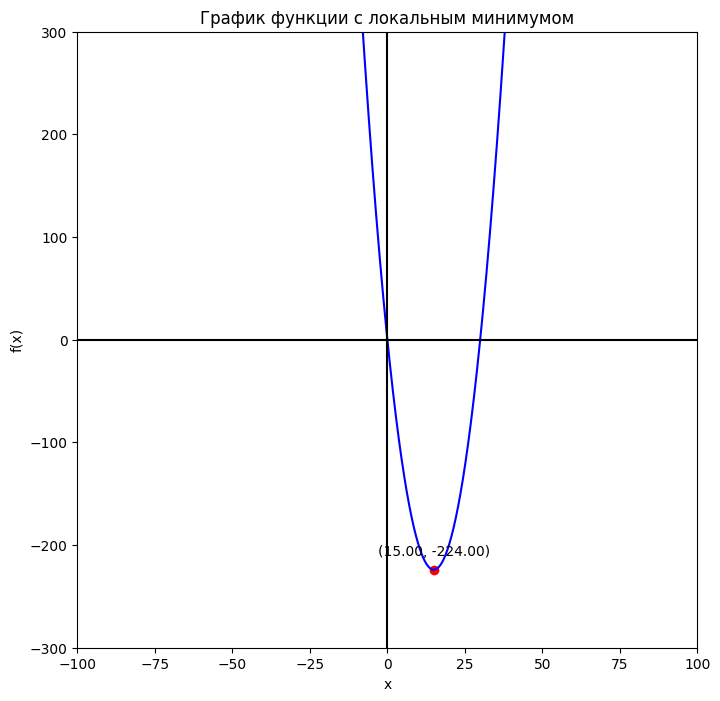

In [ ]:
# Функция f(x)
x_start = 10
eps = 1e-5
max_iter = 1000

func1 = functions[0]
min_val, iter = new(func1, x_start, eps, max_iter)
print(f'x = {min_val}, f(x) = {f(func1, min_val)}\n')

x_range = (-100, 100)
y_range = (-300, 300)
plot_function(func1, min_val, x_range, y_range)

x = -5.00000000000000, f(x) = -58.0000000000000



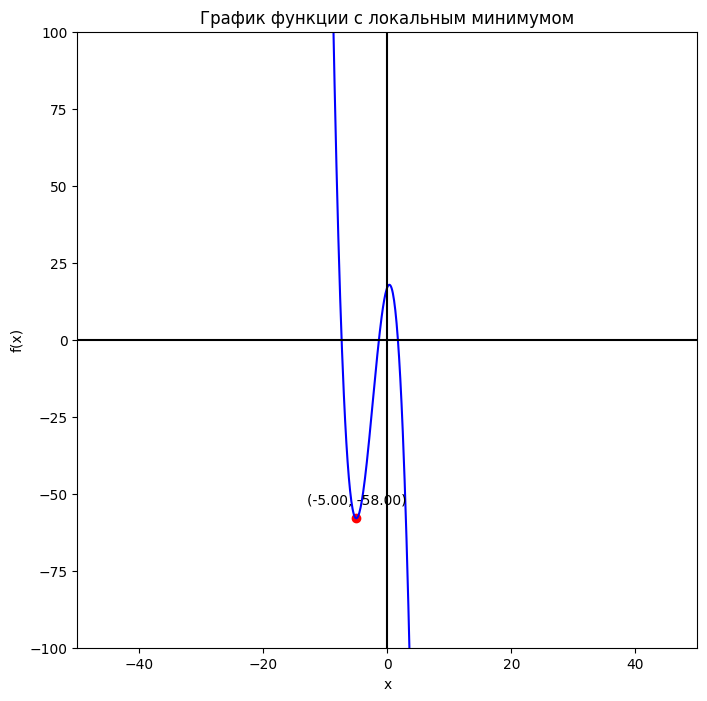

In [ ]:
# Функция g(x)
x_start = -10
eps = 1e-5
max_iter = 1000

func2 = functions[1]

min_val, iter = new(func2, x_start, eps, max_iter)
min_val = round(min_val, 0)
print(f'x = {min_val}, f(x) = {f(func2, min_val)}\n')

x_range = (-50, 50)
y_range = (-100, 100)
plot_function(func2, min_val, x_range, y_range)

x = -0.79, f(x) = 1.89062500000000



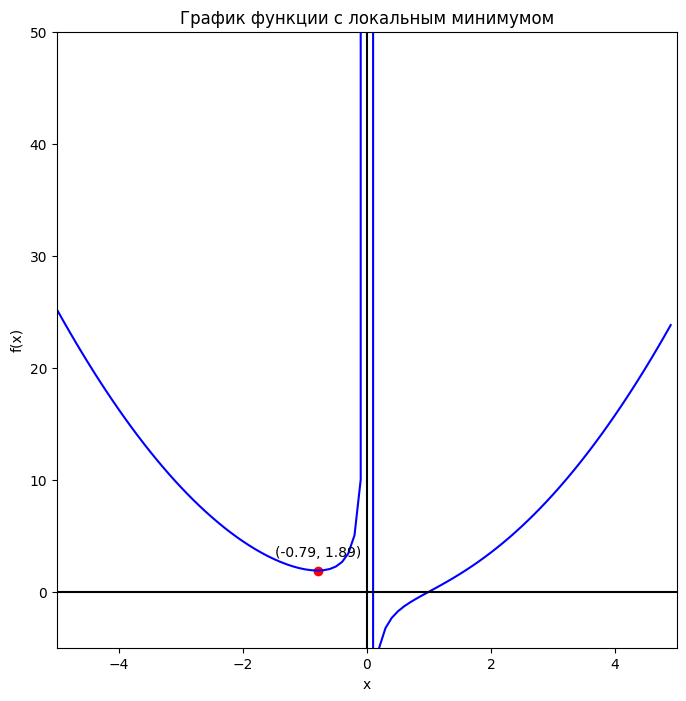

In [ ]:
# Функция h(x)
x_start = -20
eps = 1e-5
max_iter = 1000

func3 = functions[2]
min_val, iter = new(func3, x_start, eps, max_iter)
min_val = round(min_val, 2)
print(f'x = {min_val}, f(x) = {f(func3, min_val)}\n')

x_range = (-5, 5)
y_range = (-5, 50)
plot_function(func3, min_val, x_range, y_range)

x = 0.95, f(x) = 9.71875000000000



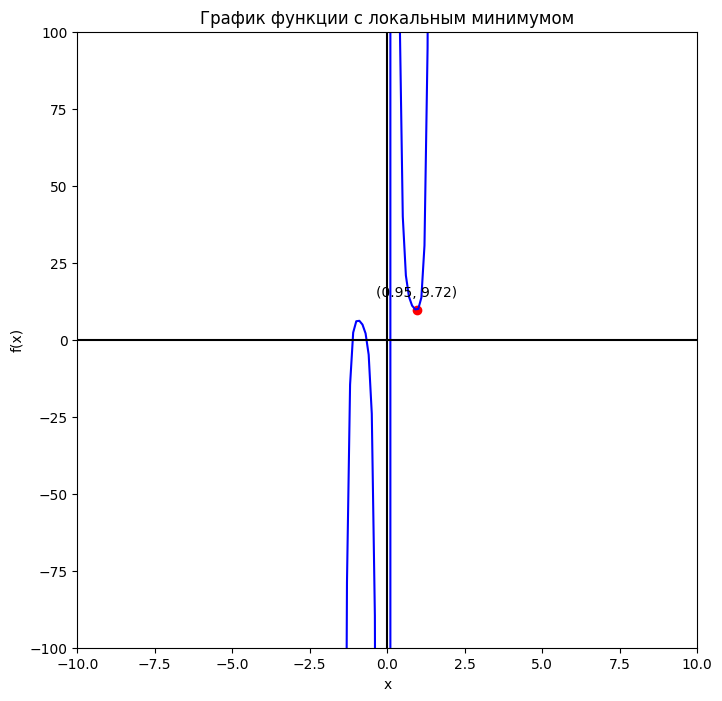

In [ ]:
# Функция j(x)
x_start = 10
eps = 1e-5
max_iter = 1000

func4 = functions[3]

min_val, iter = new(func4, x_start, eps, max_iter)
min_val = round(min_val, 2)
print(f'x = {min_val}, f(x) = {f(func4, min_val)}\n')

x_range = (-10, 10)
y_range = (-100, 100)
plot_function(func4, min_val, x_range, y_range)

## Задание 10 (1 балл)

Сравните скорость работы градиентного спуска и метода Ньютона при одинаковой точности решения $|x_{found}-x_{true}|<10^{-5}$:
* за сколько итераций каждый метод сходится (в среднем по всем функциям для правильно подобранных значений гиперпараметров)? Какой быстрее?
* какой метод дает более точный результат при фиксированном числе итераций $N=10$? (для ответа на этот вопрос добавьте в процедуру градиентного спуска возможность останавливаться при достижении некоторого количества итераций $N$)

In [ ]:
# your code here

## **Бонусная часть**

## Задание 11 (1 балл)

Реализуйте оптимизацию метода градиентного спуска - Momentum. Необходимые выкладки вы можете подсмотреть [здесь](https://education.yandex.ru/handbook/ml/article/optimizaciya-v-ml).

In [ ]:
from sympy import symbols, Float, Abs

def momentum(func, x_start, learning_rate, eps, delta, num_iter, beta=0.9):
    x_curr = Float(x_start)
    df_x = gradient(func)

    trace = [x_curr]
    vel = Float(0)

    for i in range(num_iter):
        der = df_x.subs(x, x_curr).evalf()

        if Abs(der) < delta:  # Измените здесь
            return x_curr.evalf(), trace

        vel = beta * vel - learning_rate * der
        x_new = x_curr + vel
        trace.append(x_new.evalf())

        if Abs(x_new - x_curr) < eps:  # Измените здесь
            return x_curr.evalf(), trace

        x_curr = x_new

    return x_curr.evalf(), trace

In [ ]:
from sympy import symbols, Float

x_start = 10
learning_rate = 0.001
eps = 1e-5
delta  =0.5
num_iter = 1000
beta=0.9

for f in functions:
    x, trace = momentum(f, x_start, learning_rate, eps, delta, num_iter, beta)

TypeError: cannot determine truth value of Relational

## Задание 12 (0.5 балла)

Проверьте, решает ли Momentum GD проблему поиска начального приближения для функций из задания 1?

In [ ]:
# your code here

## **Часть Котобонус** 🐈

Ура-ура, с вами снова кот, который может добавить вам баллы!
- 0.25, если вы угадаете, чей он
- 0.05 если просто предположите

**Подсказка:** кот одной из наших замечательных ассистенток!


[Кайфующий кот](https://ibb.co/12WN7wg)

Этот кот Сабрины @sabrina_sadiekh